In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [25]:
scrapped_data = '/Users/jothamwambi/Projects/JobsData/Scrapped_data.csv'
job_data = pd.read_csv(scrapped_data)
job_data.info()
job_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Name          2250 non-null   object 
 1   Company Name      2250 non-null   object 
 2   JD                2250 non-null   object 
 3   Skills            2250 non-null   object 
 4   Date Posted       2250 non-null   object 
 5   YOE               2250 non-null   object 
 6   Location          2179 non-null   object 
 7   Website           1954 non-null   object 
 8   Job Function:     2250 non-null   object 
 9   Industry:         2250 non-null   object 
 10  Specialization:   2250 non-null   object 
 11  Qualification:    2250 non-null   object 
 12  Hiring Location:  6 non-null      object 
 13  Role:             87 non-null     object 
 14  Vacancies:        12 non-null     float64
dtypes: float64(1), object(14)
memory usage: 263.8+ KB


,Job Name,Company Name,JD,Skills,Date Posted,YOE,Location,Website,Job Function:,Industry:,Specialization:,Qualification:,Hiring Location:,Role:,Vacancies:
0,Python Engineer,east india securities ltd.,job_description 2 years of experience worki...,"python,hadoop,machinelearning",Posted 5 days ago,2 - 5 yrs,Kolkata,http://www.eisec.com/,IT Software : Software Products & Services,"Petroleum/Oil and Gas/Power, Construction/Cem...",Software Engineer,Any Graduate,NaN,NaN,NaN
1,PYTHON DEVELOPER,DREAMAJAX TECHNOLOGIES,"PYTHON DEVELOPER B.E / B.Tech / MCA / M.Sc., o...","python,django,api,sql,nosql",Posted 6 days ago,4 - 7 yrs,Bengaluru / Bangalore,NaN,IT Software : Software Products & Services,"Telecom, IT-Hardware/Networking",Software Engineer,MCA/ PGDCA\r\n \r\n ...,NaN,NaN,NaN
2,Python Developer,InnOvator Web Solutions Pvt.Ltd.,Job Category: DevelopmentJob Type: Full TimeJo...,"rest,python,django,webdeveloper,mysql,api",Posted 6 days ago,5 - 8 yrs,Mumbai,http://www.innovatorwebsolutions.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN,NaN,NaN
3,Python - Odoo,AxisTechnolabs,Responsibilities : We are looking for Freshers...,"python,django,itskills,html5,api,jquery",Posted 6 days ago,0 - 1 yrs,Ahmedabad,http://www.axistechnolabs.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,MCA/ PGDCA\r\n \r\n ...,NaN,NaN,NaN
4,Python Developer,pearl global solutions,"Python Developer Django Job Type : Full time,...","python,database,django,teamplayer,sql",Posted 6 days ago,4 - 7 yrs,Cochin/ Kochi/ Ernakulam,https://pearlglobalsolutions.com/,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN,NaN,NaN


In [26]:
job_data['Vacancies:'].notna().value_counts()

Vacancies:
False    2238
True       12
Name: count, dtype: int64

In [27]:
# Since the values in Column 'Vacancies:' is too few(12) against 2,238 missing values, then it won't offer much insights. So it's safe to delete it.
job_data = job_data.drop(columns='Vacancies:')
job_data.head(1)

,Job Name,Company Name,JD,Skills,Date Posted,YOE,Location,Website,Job Function:,Industry:,Specialization:,Qualification:,Hiring Location:,Role:
0,Python Engineer,east india securities ltd.,job_description 2 years of experience worki...,"python,hadoop,machinelearning",Posted 5 days ago,2 - 5 yrs,Kolkata,http://www.eisec.com/,IT Software : Software Products & Services,"Petroleum/Oil and Gas/Power, Construction/Cem...",Software Engineer,Any Graduate,NaN,NaN


In [28]:
# Examinng other NaN Values in Role & Hiring Location Colunmns
print(job_data['Role:'].notna().value_counts())
print(job_data['Hiring Location:'].notna().value_counts())
hiring_location_not_null = job_data[job_data['Hiring Location:'].notnull()]
hiring_location_not_null


Role:
False    2163
True       87
Name: count, dtype: int64
Hiring Location:
False    2244
True        6
Name: count, dtype: int64


,Job Name,Company Name,JD,Skills,Date Posted,YOE,Location,Website,Job Function:,Industry:,Specialization:,Qualification:,Hiring Location:,Role:
94,Python Internship at Ahmedabad,Maxgen Technologies\r\n (More Jobs),Maxgen Technologies pvt ltd offering live proj...,corepython,Posted a month ago,0 - 1 yrs,(More Jobs),NaN,IT Software : Software Products & Services,IT-Software,"Internet/E-commerce,Mobile,web development",Any Graduate,Pune,"Intern, Fresher"
565,React Js Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),Maxgen Technologies Pvt Ltd is an it company ...,"react,Html",Posted a month ago,0 - 1 yrs,(More Jobs),NaN,IT Software : Software Products & Services,IT-Software,"Internet/E-commerce,Mobile",Any Graduate,Pune,"Intern, Fresher"
818,React Js Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),Maxgen technologies pvt ltd offering internshi...,"Javascript,Css,frontend",Posted a month ago,0 - 1 yrs,(More Jobs),NaN,IT Software : Software Products & Services,IT-Software,"Internet/E-commerce,Mobile,react js",Any Graduate,Pune,"Intern, Fresher"
1115,React Js Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),Maxgen technologies pvt ltd offering internshi...,"Javascript,Css,frontend",Posted a month ago,0 - 1 yrs,(More Jobs),NaN,IT Software : Software Products & Services,IT-Software,"Internet/E-commerce,Mobile,react js",Any Graduate,Pune,"Intern, Fresher"
1116,React Js Internship in Ahmedabad,Maxgen Technologies\r\n (More Jobs),Maxgen technologies is an it company based in ...,"developer,reactjs,Javascript",Posted a month ago,0 - 1 yrs,(More Jobs),NaN,IT Software : Software Products & Services,IT-Software,"Internet/E-commerce,Mobile",Any Graduate,Pune,"Intern, Fresher"
2031,"""Insurance operations executive""",Next Step Associates\r\n (More Jobs),1. Job Title: Medical Operations Sr Executive\...,"""dataentry"",""advancedexcel""",Work from Home \r\n\t\t \t\nPosted few days...,5 - 7 yrs,(More Jobs),NaN,Administration,Insurance,"Administration,Office Management & Coordinatio...",Any Graduate,Dubai,"Administration Assistant/ Executive, Operation..."


In [29]:
# Let's drop Hiring Location Column and leave Role Column. Hiring Column only has 6 rows with data.
job_data = job_data.drop(columns='Hiring Location:')
job_data.head()

,Job Name,Company Name,JD,Skills,Date Posted,YOE,Location,Website,Job Function:,Industry:,Specialization:,Qualification:,Role:
0,Python Engineer,east india securities ltd.,job_description 2 years of experience worki...,"python,hadoop,machinelearning",Posted 5 days ago,2 - 5 yrs,Kolkata,http://www.eisec.com/,IT Software : Software Products & Services,"Petroleum/Oil and Gas/Power, Construction/Cem...",Software Engineer,Any Graduate,NaN
1,PYTHON DEVELOPER,DREAMAJAX TECHNOLOGIES,"PYTHON DEVELOPER B.E / B.Tech / MCA / M.Sc., o...","python,django,api,sql,nosql",Posted 6 days ago,4 - 7 yrs,Bengaluru / Bangalore,NaN,IT Software : Software Products & Services,"Telecom, IT-Hardware/Networking",Software Engineer,MCA/ PGDCA\r\n \r\n ...,NaN
2,Python Developer,InnOvator Web Solutions Pvt.Ltd.,Job Category: DevelopmentJob Type: Full TimeJo...,"rest,python,django,webdeveloper,mysql,api",Posted 6 days ago,5 - 8 yrs,Mumbai,http://www.innovatorwebsolutions.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN
3,Python - Odoo,AxisTechnolabs,Responsibilities : We are looking for Freshers...,"python,django,itskills,html5,api,jquery",Posted 6 days ago,0 - 1 yrs,Ahmedabad,http://www.axistechnolabs.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,MCA/ PGDCA\r\n \r\n ...,NaN
4,Python Developer,pearl global solutions,"Python Developer Django Job Type : Full time,...","python,database,django,teamplayer,sql",Posted 6 days ago,4 - 7 yrs,Cochin/ Kochi/ Ernakulam,https://pearlglobalsolutions.com/,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN


In [30]:
#Cleaning the Qualification Column to remove unwanted characters and spaces.
job_data['Qualification:'].unique() # Examining the 'Qualification:' column for any incoherent text strings or unwanted characters

array(['Any Graduate',
       'MCA/ PGDCA\r\n                    \r\n                    \r\n                  \n\r\n                    BE/ B.Tech (Engineering)',
       'MCA/ PGDCA\r\n                    \r\n                    \r\n                  \n\r\n                    BCA (Computer Application)',
       'ME/ M.Tech./ MS (Engg/ Sciences)\r\n                    \r\n                    \r\n                  \n\r\n                    Any Graduate',
       'BE/ B.Tech (Engineering)',
       'MCA/ PGDCA\r\n                    \r\n                    \r\n                  \n\r\n                    Any Graduate',
       'M.Ed. (Education)\r\n                    \r\n                    \r\n                  \n\r\n                    Any Graduate',
       'M.Sc. (Science)\r\n                    \r\n                    \r\n                  \n\r\n                    BE/ B.Tech (Engineering)',
       'ME/ M.Tech./ MS (Engg/ Sciences)\r\n                    \r\n                    \r\n    

In [31]:
job_data['Qualification:'] = job_data['Qualification:'].str.replace(r'[\r\n]+', ' ', regex=True).str.strip() #Cleaning the 'Qualification:' column by removing unwanted characters and trimming excessive spaces
job_data['Qualification:']

0                                            Any Graduate
1       MCA/ PGDCA                                    ...
2                                            Any Graduate
3       MCA/ PGDCA                                    ...
4                                            Any Graduate
                              ...                        
2245    MBA/ PGDM                                     ...
2246    ME/ M.Tech./ MS (Engg/ Sciences)              ...
2247                                         Any Graduate
2248    ME/ M.Tech./ MS (Engg/ Sciences)              ...
2249                                    B.Com. (Commerce)
Name: Qualification:, Length: 2250, dtype: object

In [32]:
job_data.head()

,Job Name,Company Name,JD,Skills,Date Posted,YOE,Location,Website,Job Function:,Industry:,Specialization:,Qualification:,Role:
0,Python Engineer,east india securities ltd.,job_description 2 years of experience worki...,"python,hadoop,machinelearning",Posted 5 days ago,2 - 5 yrs,Kolkata,http://www.eisec.com/,IT Software : Software Products & Services,"Petroleum/Oil and Gas/Power, Construction/Cem...",Software Engineer,Any Graduate,NaN
1,PYTHON DEVELOPER,DREAMAJAX TECHNOLOGIES,"PYTHON DEVELOPER B.E / B.Tech / MCA / M.Sc., o...","python,django,api,sql,nosql",Posted 6 days ago,4 - 7 yrs,Bengaluru / Bangalore,NaN,IT Software : Software Products & Services,"Telecom, IT-Hardware/Networking",Software Engineer,MCA/ PGDCA ...,NaN
2,Python Developer,InnOvator Web Solutions Pvt.Ltd.,Job Category: DevelopmentJob Type: Full TimeJo...,"rest,python,django,webdeveloper,mysql,api",Posted 6 days ago,5 - 8 yrs,Mumbai,http://www.innovatorwebsolutions.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN
3,Python - Odoo,AxisTechnolabs,Responsibilities : We are looking for Freshers...,"python,django,itskills,html5,api,jquery",Posted 6 days ago,0 - 1 yrs,Ahmedabad,http://www.axistechnolabs.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,MCA/ PGDCA ...,NaN
4,Python Developer,pearl global solutions,"Python Developer Django Job Type : Full time,...","python,database,django,teamplayer,sql",Posted 6 days ago,4 - 7 yrs,Cochin/ Kochi/ Ernakulam,https://pearlglobalsolutions.com/,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN


In [33]:
job_data = job_data.drop(columns='Date Posted') # Drop Date Posted Column (Not Needed for this Analysis)
job_data.head()

,Job Name,Company Name,JD,Skills,YOE,Location,Website,Job Function:,Industry:,Specialization:,Qualification:,Role:
0,Python Engineer,east india securities ltd.,job_description 2 years of experience worki...,"python,hadoop,machinelearning",2 - 5 yrs,Kolkata,http://www.eisec.com/,IT Software : Software Products & Services,"Petroleum/Oil and Gas/Power, Construction/Cem...",Software Engineer,Any Graduate,NaN
1,PYTHON DEVELOPER,DREAMAJAX TECHNOLOGIES,"PYTHON DEVELOPER B.E / B.Tech / MCA / M.Sc., o...","python,django,api,sql,nosql",4 - 7 yrs,Bengaluru / Bangalore,NaN,IT Software : Software Products & Services,"Telecom, IT-Hardware/Networking",Software Engineer,MCA/ PGDCA ...,NaN
2,Python Developer,InnOvator Web Solutions Pvt.Ltd.,Job Category: DevelopmentJob Type: Full TimeJo...,"rest,python,django,webdeveloper,mysql,api",5 - 8 yrs,Mumbai,http://www.innovatorwebsolutions.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN
3,Python - Odoo,AxisTechnolabs,Responsibilities : We are looking for Freshers...,"python,django,itskills,html5,api,jquery",0 - 1 yrs,Ahmedabad,http://www.axistechnolabs.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,MCA/ PGDCA ...,NaN
4,Python Developer,pearl global solutions,"Python Developer Django Job Type : Full time,...","python,database,django,teamplayer,sql",4 - 7 yrs,Cochin/ Kochi/ Ernakulam,https://pearlglobalsolutions.com/,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,NaN


In [34]:
job_data.describe()

,Job Name,Company Name,JD,Skills,YOE,Location,Website,Job Function:,Industry:,Specialization:,Qualification:,Role:
count,2250,2250,2250,2250,2250,2179,1954,2250,2250,2250,2250,87
unique,1169,844,1796,1701,83,176,731,24,71,111,36,37
top,Java Developer,HyreFox Consultants,Test Automation Engineer - Python BangaloreAbo...,"pythontestautomation,flashbootloadertesting,se...",0 - 3 yrs,Bengaluru / Bangalore,http://www.hyrefox.com,IT Software : Software Products & Services,"IT-Hardware/Networking, Telecom",Software Engineer,Any Graduate,Software Developer/ Programmer
freq,140,67,66,24,432,412,67,1970,1072,1654,1429,24


In [35]:
print(job_data['Location'].value_counts(), job_data['YOE'].value_counts(), job_data['Industry:'].value_counts())

Location
Bengaluru / Bangalore                             412
(More Jobs)                                       151
Mumbai                                            149
Chennai                                           141
Noida/Greater Noida                               135
                                                 ... 
Karnal                                              1
Pondicherry/Puducherry,  Chennai                    1
Gurgaon,  Pune,  Bengaluru / Bangalore              1
Hyderabad/Secunderabad,  Bengaluru / Bangalore      1
Delhi,  Delhi/NCR,  Bengaluru / Bangalore           1
Name: count, Length: 176, dtype: int64 YOE
0 - 3 yrs     432
2 - 5 yrs     218
3 - 6 yrs     158
5 - 8 yrs     152
4 - 7 yrs     147
             ... 
7 - 15 yrs      1
6 - 7 yrs       1
3 - 9 yrs       1
3 - 15 yrs      1
6 - 12 yrs      1
Name: count, Length: 83, dtype: int64 Industry:
IT-Hardware/Networking,  Telecom                               1072
Consulting Services                     

##### Descriptive Stats:
* 844 Unique Companies
* 1169 Unique Job Postings
* Commonest Job Name is 'Java Developer' with 140 Postings
* Commonest Years of Experience range from 0-3 years.
* 71 Unique Industries


In [36]:
job_data['Skills']

0                           python,hadoop,machinelearning
1                             python,django,api,sql,nosql
2               rest,python,django,webdeveloper,mysql,api
3                 python,django,itskills,html5,api,jquery
4                   python,database,django,teamplayer,sql
                              ...                        
2245    reports,managementaccounting,reporting,cfa,exc...
2246    msexcel,unicaandsalesforce,communication,motiv...
2247    DataAnalysis,teamleader,projectmanager,project...
2248    msexcel,tally,accounting,internship,finance,ta...
2249    Tally,e,emailwriting,MsExcel,BusinessAdministr...
Name: Skills, Length: 2250, dtype: object

In [37]:
all_skills = job_data['Skills'].str.split(',').explode()
skill_counts = all_skills.value_counts()
skill_counts.head()


Skills
javascript    796
css           638
html          628
java          439
jquery        380
Name: count, dtype: int64

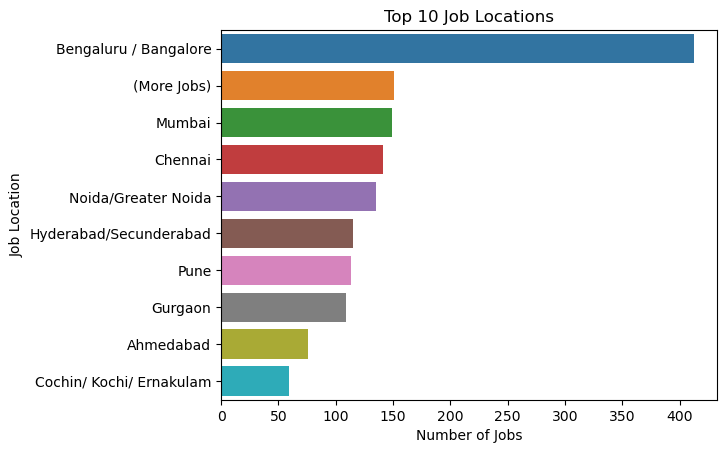

In [38]:
#Top 10 Job Locations

location_counts = job_data['Location'].value_counts().head(10)
sns.barplot(x=location_counts,y=location_counts.index,hue=location_counts.index)
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Location')
plt.show()

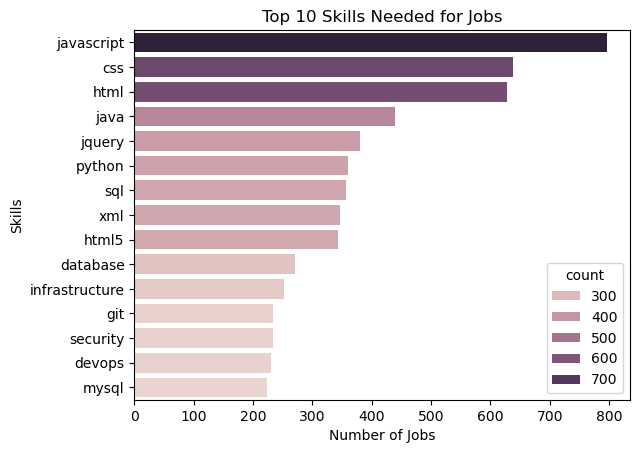

In [39]:
#Top 10 Skills
sns.barplot(x=skill_counts.head(15),y=skill_counts.head(15).index,hue=skill_counts.head(15))
plt.title('Top 10 Skills Needed for Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Skills')
plt.show()

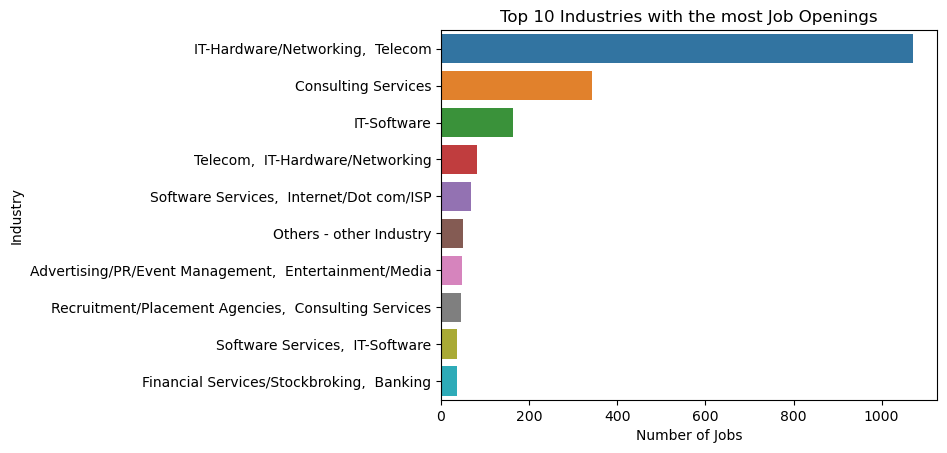

In [40]:
#Top 10 Industries with the most Job Openings
industry_count = job_data['Industry:'].value_counts().head(10)

sns.barplot(x=industry_count,y=industry_count.index,hue=industry_count.index)
plt.title('Top 10 Industries with the most Job Openings')
plt.xlabel('Number of Jobs')
plt.ylabel('Industry')
plt.show()

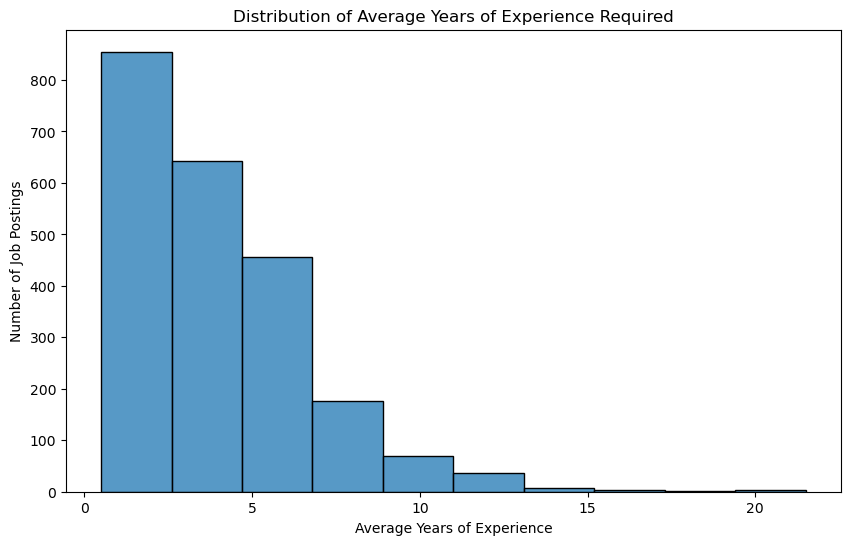

In [41]:
# Processing the YOE data
def process_yoe_range(yoe_range):
    if pd.isna(yoe_range):
        return None
    yoe_split = yoe_range.split('-')
    min_yoe = int(yoe_split[0].strip().split(' ')[0])
    max_yoe = int(yoe_split[1].strip().split(' ')[0])
    return (min_yoe + max_yoe) / 2

job_data['Average YOE'] = job_data['YOE'].apply(process_yoe_range)

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(job_data['Average YOE'], bins=10, kde=False)
plt.title('Distribution of Average Years of Experience Required')
plt.xlabel('Average Years of Experience')
plt.ylabel('Number of Job Postings')
plt.show()


In [42]:
fig = px.histogram(job_data, 
                   x='Average YOE', 
                   nbins=10, 
                   title='Distribution of Average Years of Experience Required')
fig.show()

In [43]:
fig = px.pie(values=skill_counts.head(10), 
             names=skill_counts.head(10).index, 
             title='Top 10 Skills Distribution')
fig.show()

In [44]:
fig= px.bar(industry_count,
            x=industry_count.values,
            y=industry_count.index,
            labels={'x':'Number of Jobs','index':'Industry'},
            title='Top 10 Industries for Jobs')
fig.show()